[u'Reflectivity', u'lat', u'lon', u'time']
Z shape (412, 688) [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Z min, Z max nan nan
lat shape, lon shape (412,) (688,)
Z shape (412, 688) [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Z_40 shape (412, 688)
lats shape, lons shape (412, 688) (412, 688) [[27.70509979 27.70509979 27.70509979 ... 27.70509979 27.70509979
  27.70509979]
 [27.71262603 27.71262603 27.71262603 ... 27.71262603 27.71262603
  27.71262603]
 [27.72015226 27.72015226 27.72015226 ... 27.72015226 27.72015226
  27.72015226]
 ...
 [30.78333076 30.78333076 30.78333076 ... 30.78333076 30.78333076
  30.78333076]
 [30.79085699 30.79085699 30.79085699 ... 30.79085699 30.79085699
  30.79085699]
 [

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater
c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less


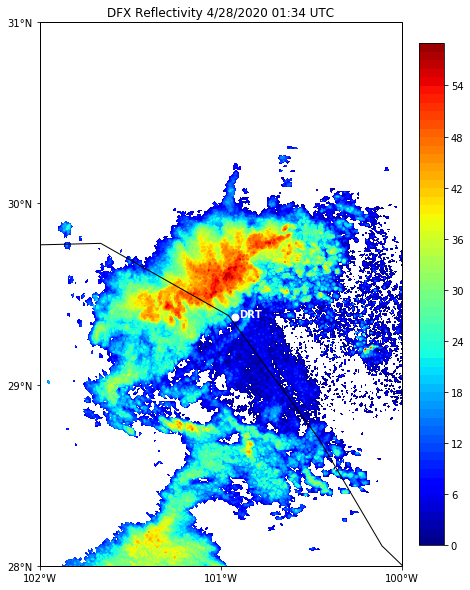

In [3]:
from __future__ import print_function, division
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset 
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

Z_file = 'KDFX_V06_20200428_013401.nc'
Z, lat, lon, names = read_radar_plot(Z_file)
Z = Z[0,:,:]
print(names)
print('Z shape', Z.shape, Z)
Z_max = np.amax(Z)
Z_min = np.amin(Z)
print('Z min, Z max', Z_min, Z_max)
print('lat shape, lon shape', lat.shape, lon.shape)

Z[Z>60]=59
print('Z shape', Z.shape, Z)

Z_40 = ma.masked_where(Z < 40, Z)
print('Z_40 shape', Z_40.shape)

lonz,latz = np.meshgrid(lon,lat)
print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)

fig = plt.figure(figsize=(10, 10))
img_extent = (-102, -100, 28, 31)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-102, -100, 28, 31], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('DFX Reflectivity 4/28/2020 01:34 UTC')

Zlevels = np.arange(0,60,1)
cZ = ax.contourf(lonz,latz,Z,Zlevels,latlon=True,cmap=plt.cm.jet,vmin=0,vmax=60)
ax.coastlines(resolution='50m', color='cyan', linewidth=1)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
ax.set_xticks([-102,-101,-100])
ax.set_yticks([28,29,30,31])
"""
#Plot dryline boundary
coord1 = [-101.5,32]
coord2 = [-103,30.5]
coord3 = [-103.1,29]

lon_values1 = [coord1[0], coord2[0]]
lat_values1 = [coord1[1], coord2[1]]

lon_values2 = [coord2[0], coord3[0]]
lat_values2 = [coord2[1], coord3[1]]

plt.plot(lon_values1, lat_values1, linewidth=4, color = "tan")
plt.plot(lon_values2, lat_values2, linewidth=4, color = "tan")
"""

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-100.9, 29.37472, 'DRT', color='white', weight='bold', transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cZ,fraction=0.045,pad=0.03)
plt.savefig("Z40_0134_DFX.png",dpi=250,bbox_inches='tight')
plt.show()